In [64]:
import numpy as np
from math import gcd
# from scipy.optimize import linprog
import matplotlib.pyplot as plt

import ot
import ot.plot
import matplotlib.pylab as pl

In [31]:
def OT_solver(P,Q,m,n,fig_1=True,fig_3=True,fig_4=True):
    """
    Using Python OT solver:
    https://pythonot.github.io/auto_examples/plot_OT_2D_samples.html#sphx-glr-auto-examples-plot-ot-2d-samples-py
    """
    M = ot.dist(P,Q, p=1)
    a,b = np.ones((n,)) / n, np.ones((m,)) / m
    
    if fig_1:
        pl.figure(1)
        pl.plot(P[:, 0], P[:, 1], '+b', label='Source samples')
        pl.plot(Q[:, 0], Q[:, 1], 'xr', label='Target samples')
        pl.legend(loc=0)
        pl.title('Source and target distributions')

        pl.figure(2)
        pl.imshow(M, interpolation='nearest')
        pl.title('Cost matrix M')
    G0 = ot.emd(a, b, M)
    if fig_3:
        pl.figure(3)
        pl.imshow(G0, interpolation='nearest')
        pl.title('OT matrix G0')

    if fig_4:
        pl.figure(4)
        ot.plot.plot2D_samples_mat(P, Q, G0, c=[.5, .5, 1])
        pl.plot(P[:, 0], P[:, 1], '+b', label='Source samples')
        pl.plot(Q[:, 0], Q[:, 1], 'xr', label='Target samples')
        pl.legend(loc=0)
        pl.title('OT matrix with samples')

    return G0

### Using Python OT package

#### Example 1

In [25]:
n = 200
m = 300
P = np.array([[0, np.random.random()] for _ in range(n)])
Q = np.array([[np.random.choice([-1, 1]), np.random.random()] for _ in range(m)])

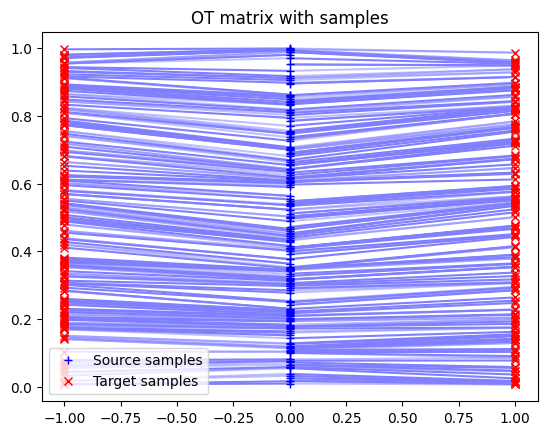

In [26]:
G0, M = OT_solver(P,Q,m,n,fig_1=False,fig_3=False,fig_4=True)

#### Example 2

In [49]:
n = 20
m = 30
# Generate random pairs for P
P = np.random.rand(n, 2)

# Generate random pairs for Q
Q = np.random.rand(m, 2)

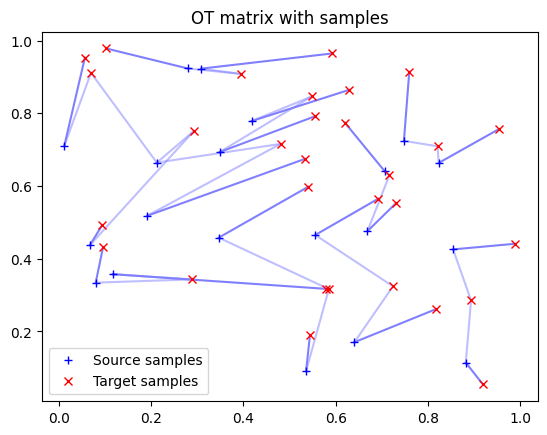

In [50]:
G0 = OT_solver(P,Q,m,n,fig_1=False,fig_3=False,fig_4=True)

In [51]:
G0 = np.where(G0 < 1e-10, 0, G0)

In [52]:
row_ind_list = [np.count_nonzero(G0[arr]) for arr in range(len(G0))]
col_ind_list = [np.count_nonzero((G0.T)[arr]) for arr in range(len((G0.T)))]
row_ratio = [(np.unique(row_ind_list, return_counts=True)[1][i]/len(row_ind_list),np.unique(row_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(row_ind_list, return_counts=True)[0]))]
col_ratio = [(np.unique(col_ind_list, return_counts=True)[1][i]/len(col_ind_list),np.unique(col_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(col_ind_list, return_counts=True)[0]))]

In [59]:
def get_unique(row_ind_list):
    element_lists = {}
    # Iterate through the original list
    for item in row_ind_list:
        # Check if the element is already a key in the dictionary
        if item in element_lists:
            # If it's already a key, append the item to the existing list
            element_lists[item].append(item)
        else:
            # If it's not a key, create a new list with the element as the key
            element_lists[item] = [item]

    # Convert the dictionary values (lists) into a list of lists
    result_lists = list(element_lists.values())
    return result_lists

In [40]:
col_ratio

[(0.6666666666666666, 1), (0.3333333333333333, 2)]

In [44]:
row_ratio_list = []
col_ratio_list = []
for _ in range(200):
    P = np.random.rand(n, 2)
    Q = np.random.rand(m, 2)
    # P = np.array([[0, np.random.random()] for _ in range(n)])
    # Q = np.array([[np.random.choice([-1, 1]), np.random.random()] for _ in range(m)])

    G0 = OT_solver(P,Q,m,n,fig_1=False,fig_3=False,fig_4=False)
    G0 = np.where(G0 < 1e-10, 0, G0)
    row_ind_list = [np.count_nonzero(G0[arr]) for arr in range(len(G0))]
    col_ind_list = [np.count_nonzero((G0.T)[arr]) for arr in range(len((G0.T)))]
    row_ratio = [(np.unique(row_ind_list, return_counts=True)[1][i]/len(row_ind_list),np.unique(row_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(row_ind_list, return_counts=True)[0]))]
    col_ratio = [(np.unique(col_ind_list, return_counts=True)[1][i]/len(col_ind_list),np.unique(col_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(col_ind_list, return_counts=True)[0]))]



    row_ratio_list.append(row_ratio)
    col_ratio_list.append(col_ratio)

In [72]:
list(range((int(m / gcd(20,30)))+1))

[0, 1, 2, 3]

In [73]:
row_ratio_list = []
col_ratio_list = []
possible_m = list(range((int(m / gcd(20,30)))+1))
possible_n = list(range((int(n / gcd(20,30)))+1))
for _ in range(200):
    P = np.random.rand(n, 2)
    Q = np.random.rand(m, 2)

    G0 = OT_solver(P,Q,m,n,fig_1=False,fig_3=False,fig_4=False)
    G0 = np.where(G0 < 1e-10, 0, G0)
    row_ind_list = [np.count_nonzero(G0[arr]) for arr in range(len(G0))]
    col_ind_list = [np.count_nonzero((G0.T)[arr]) for arr in range(len((G0.T)))]
    unique_row, unique_col = get_unique(row_ind_list), get_unique(col_ind_list)
    # row_ratio = [(np.unique(row_ind_list, return_counts=True)[1][i]/len(row_ind_list),np.unique(row_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(row_ind_list, return_counts=True)[0]))]
    # col_ratio = [(np.unique(col_ind_list, return_counts=True)[1][i]/len(col_ind_list),np.unique(col_ind_list, return_counts=True)[0][i]) for i in range(len(np.unique(col_ind_list, return_counts=True)[0]))]



    row_ratio_list.append(row_ratio)
    col_ratio_list.append(col_ratio)

In [48]:
row_ind_list

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [45]:
row_ratio_list

[[(0.9, 2), (0.1, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.85, 2), (0.15, 3)],
 [(1.0, 2)],
 [(1.0, 2)],
 [(0.9, 2), (0.1, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(1.0, 2)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.85, 2), (0.15, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.85, 2), (0.15, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(0.9, 2), (0.1, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.9, 2), (0.1, 3)],
 [(1.0, 2)],
 [(1.0, 2)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(0.85, 2), (0.15, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(0.9, 2), (0.1, 3)],
 [(1.0, 2)],
 [(0.9, 2), (0.1, 3)],
 [(0.9, 2), (0.1, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.95, 2), (0.05, 3)],
 [(0.85, 2), (0.15, 3)],
 [(0.9, 2), (0.1, 3)],
 [(0.95, 2), (0.05, 3)],
 [(1.0, 2)],
 [(1.0, 2)],
 [(0.9, 2

In [12]:
list_2 = []
list_3 = []
for i in row_ratio_list:
    if len(i) > 1:
        list_2.append(i[0][0])
        list_3.append(i[1][0])
    elif i[0][1] == 2:
        list_2.append(i[0][0])
        list_3.append(0.)

In [13]:
avg_stat_2 = np.mean(list_2)
avg_stat_3 = np.mean(list_3)

In [14]:
print("The average frequency of one blue dot matching to two red dots is: " + str(avg_stat_2))
print("The average frequency of one blue dot matching to three red dots is: " + str(avg_stat_3))

The average frequency of one blue dot matching to two red dots is: 0.934075
The average frequency of one blue dot matching to three red dots is: 0.06592500000000001


In [15]:
list_1_col = []
list_2_col = []
for i in col_ratio_list:
    if len(i) > 1:
        list_1_col.append(i[0][0])
        list_2_col.append(i[1][0])
    elif i[0][1] == 1:
        list_1_col.append(i[0][0])
        list_2_col.append(0.)
    elif i[0][1] == 2:
        list_1_col.append(0.)
        list_2_col.append(i[0][0])

In [16]:
avg_stat_1_col = np.mean(list_1_col)
avg_stat_2_col = np.mean(list_2_col)

In [17]:
print("The average frequncy of one red dot matching to one blue dot is: " + str(avg_stat_1_col))
print("The average frequncy of one red dot matching to two blue dot is: " + str(avg_stat_2_col))

The average frequncy of one red dot matching to one blue dot is: 0.6227166666666666
The average frequncy of one red dot matching to two blue dot is: 0.3772833333333333


One thing that is clear to observe is that the higher matching number blue matching to red happens way less often than the analogous result for red to blue. Why is that the case? 3 and 2 are both the extreme possible solutions, so why is it so much more likely that a red dot matches to two blue dots and not one blue dot matching to 3 red dots?

Question 1: Do different GCDs, like coprime numbers. See if we can find some kind of pattern with the GCDs. Distribution shouldn't matter too much.

Look at references:
1. Beardwood, Helton, Hammersley
2. J.M. Steele. Theorem: $\lim_{n \to \infty} \frac{\mathrm{TSP}(n)}{\sqrt{n}} = \beta$, where we think $0.5 \leq \beta \leq 0.9$.

Look at Subadditive Geometric Euclidean Functionals 

HW:
1. Check whether p (this is the Wasserstein) matters? Prioritize p = 1
2. Larger numbers, what happens?
3. Read Steele, paper above. Also, maybe Yukich - Probability Theory of Classical Euclidean Optimization Problems.